# 01. PyTorch Workflows

Resource notebook: https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.7.1


## Data preparing and loading

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Spliting data into train and test set

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train[:10], y_train[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14});
    plt.show()

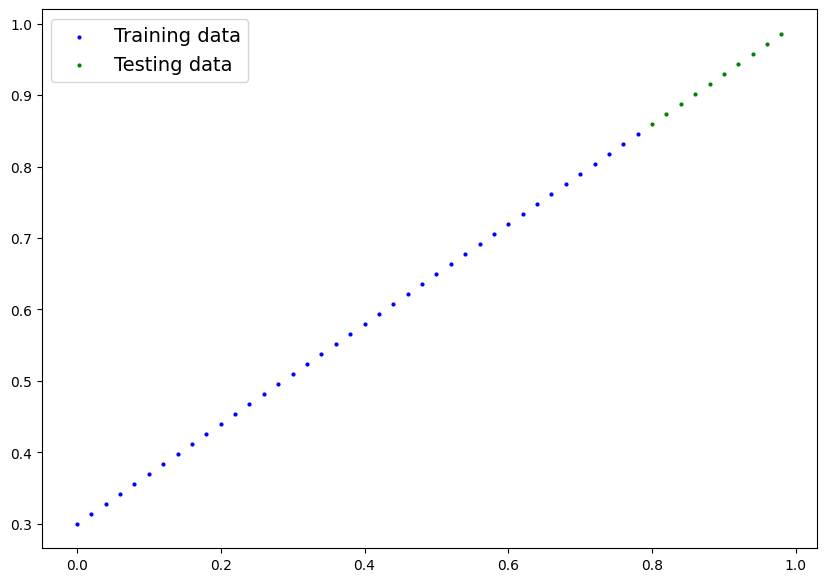

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building a model

In [55]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [56]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [57]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [58]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [59]:
weight, bias

(0.7, 0.3)

In [60]:
%%time
with torch.no_grad():
    y_preds = model_0(X_test)

y_preds, y_test

CPU times: user 688 μs, sys: 1.14 ms, total: 1.83 ms
Wall time: 1.45 ms


(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [61]:
%%time
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds, y_test

CPU times: user 383 μs, sys: 380 μs, total: 763 μs
Wall time: 1.02 ms


(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

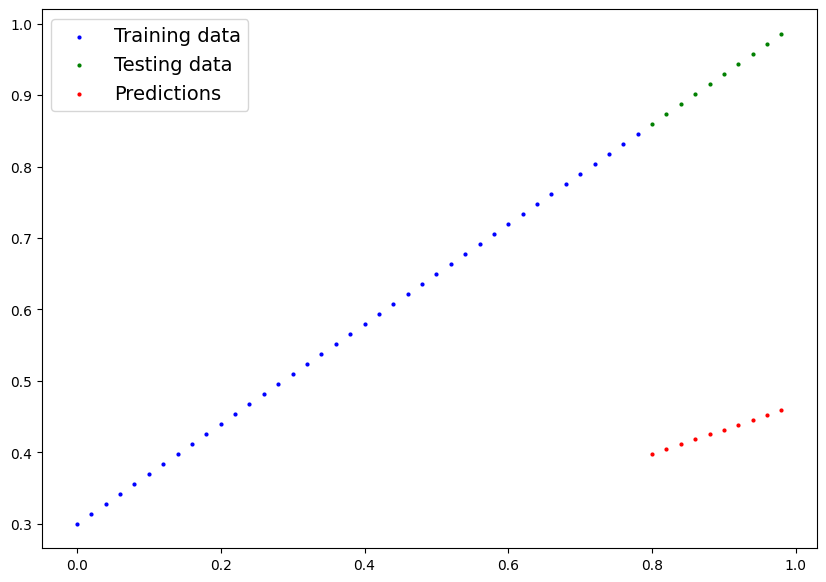

In [62]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [116]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [117]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [18]:
epochs = 100

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

    model_0.eval()
    
    print(model_0.state_dict())

Loss: 0.31288135051727295
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Loss: 0.3013603687286377
OrderedDict({'weights': tensor([0.3445]), 'bias': tensor([0.1488])})
Loss: 0.28983935713768005
OrderedDict({'weights': tensor([0.3484]), 'bias': tensor([0.1588])})
Loss: 0.2783183455467224
OrderedDict({'weights': tensor([0.3523]), 'bias': tensor([0.1688])})
Loss: 0.26679736375808716
OrderedDict({'weights': tensor([0.3562]), 'bias': tensor([0.1788])})
Loss: 0.2552763521671295
OrderedDict({'weights': tensor([0.3601]), 'bias': tensor([0.1888])})
Loss: 0.24375534057617188
OrderedDict({'weights': tensor([0.3640]), 'bias': tensor([0.1988])})
Loss: 0.23223432898521423
OrderedDict({'weights': tensor([0.3679]), 'bias': tensor([0.2088])})
Loss: 0.22071333229541779
OrderedDict({'weights': tensor([0.3718]), 'bias': tensor([0.2188])})
Loss: 0.20919232070446014
OrderedDict({'weights': tensor([0.3757]), 'bias': tensor([0.2288])})
Loss: 0.1976713389158249
OrderedDict({'weights': tens

In [19]:
with torch.inference_mode():
    y_pred = model_0(X_test)

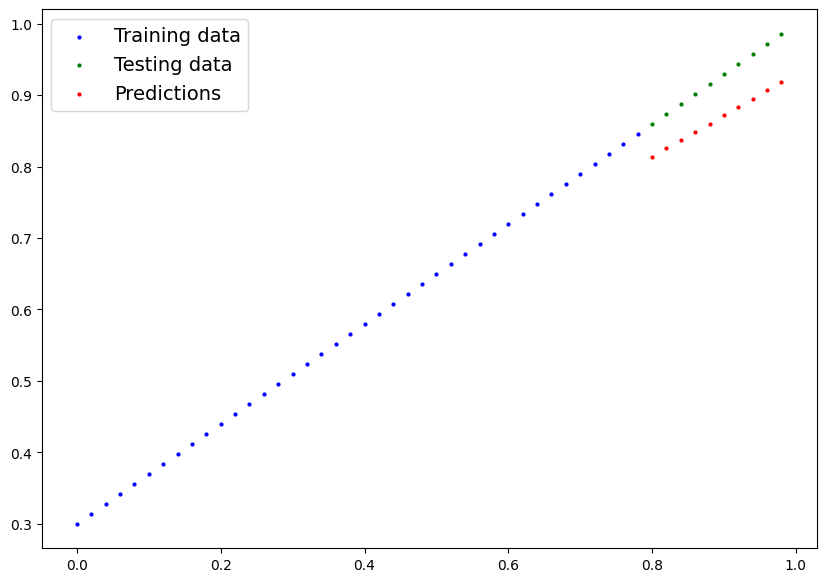

In [20]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [54]:
### Testing code

epochs = 100

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    
    loss = loss_fn(y_pred, y_train)
    # print(f"Loss: {loss}")
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

    model_0.eval() # turns off difference settings in the model not needed for evaluation / testing (dropout / batch norm layers)
    with torch.inference_mode(): # turns off gradient tracing & a couple more things behinde the scenes
    # with torch.no_grad():     
        # 1. Do the forwad pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288135051727295 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713389158249 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.2172965705394745
Epoch: 30 | Loss: 0.053148530423641205 | Test loss: 0.14464019238948822
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953748226166
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633813381195
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937722325325
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.027887403964996338 | Test loss: 0.06473556160926819


In [ ]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    
    loss = loss_fn(y_pred, y_train)
    # print(f"Loss: {loss}")
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

    model_0.eval() # turns off difference settings in the model not needed for evaluation / testing (dropout / batch norm layers)
    with torch.inference_mode(): # turns off gradient tracing & a couple more things behinde the scenes
    # with torch.no_grad():     
        # 1. Do the forwad pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | Test loss: {test_loss}")

    # print(model_0.state_dict())

Epoch: 0 | Loss: 0.3013603687286377 | Test loss: 0.4675942063331604
Epoch: 10 | Loss: 0.18615034222602844 | Test loss: 0.3328842222690582
Epoch: 20 | Loss: 0.08227582275867462 | Test loss: 0.2069590985774994
Epoch: 30 | Loss: 0.051819466054439545 | Test loss: 0.14023718237876892
Epoch: 40 | Loss: 0.04503796622157097 | Test loss: 0.11182951927185059
Epoch: 50 | Loss: 0.04132963344454765 | Test loss: 0.09809747338294983
Epoch: 60 | Loss: 0.037852440029382706 | Test loss: 0.08776430785655975
Epoch: 70 | Loss: 0.03441363200545311 | Test loss: 0.07949177175760269
Epoch: 80 | Loss: 0.030979642644524574 | Test loss: 0.07190610468387604
Epoch: 90 | Loss: 0.027548829093575478 | Test loss: 0.06363358348608017
Epoch: 100 | Loss: 0.024110015481710434 | Test loss: 0.05536102503538132
Epoch: 110 | Loss: 0.020677709951996803 | Test loss: 0.04777535796165466
Epoch: 120 | Loss: 0.017245203256607056 | Test loss: 0.0395028293132782
Epoch: 130 | Loss: 0.01380639337003231 | Test loss: 0.031230276450514793


In [74]:
import numpy as np
loss_values = np.array(torch.tensor(loss_values).numpy())

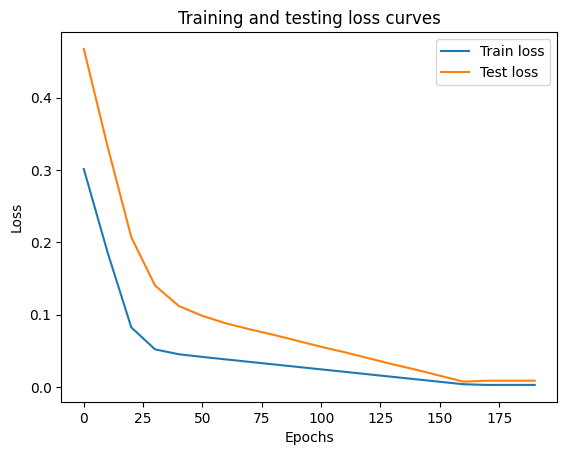

In [77]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [79]:
## Saving a model in PyTorch

## There are three main methods you should about for saving and loading models in PyTorch
## 1.
## 2.
## 3.

In [84]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [86]:
# Saving out PyTorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflows_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(
    obj=model_0.state_dict(),
    f=MODEL_SAVE_PATH
)

Saving model to: models/01_pytorch_workflows_model_0.pth


In [87]:
## Loading a PyTorch model

# Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [88]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [94]:
# To load in a saved state_dict() we have to inistanciate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(
    torch.load(f=MODEL_SAVE_PATH)
)

<All keys matched successfully>

In [93]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [95]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [101]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [100]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go through the steps above and see it all in one place

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pytplot as plt

# Check PyTorch version
torch.__version__

Create device-agnostic code.

This means if we've ot access to a GPU, our code will use it (for potentially faster computig)

If no GPU is available, the code will default to using GPU.

In [102]:
# Setup device agnostic code
device = "gpu" if torch.cuda.is_available() else "mps"
print(f"Using device: {device}")

Using device: mps


### 6.1 Data

In [122]:
# Create some data using the linear regression formula of y = weights * X + bias
weigh = 0.2
bias = 0.1

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step, device=device).unsqueeze(dim=1) 
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]], device='mps:0'),
 tensor([[0.1000],
         [0.1140],
         [0.1280],
         [0.1420],
         [0.1560],
         [0.1700],
         [0.1840],
         [0.1980],
         [0.2120],
         [0.2260]], device='mps:0'))

In [123]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [124]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error

# def plot_predictions(train_data=X_train, train_labels=y_train,
#                      test_data=X_test, test_labels=y_test,
#                      predictions=None):
#     """
#     Plots training data, test data and compares predictions.
#     """
#     plt.figure(figsize=(10, 7))
    
#     plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
#     plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
#     if predictions is not None:
#         plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
#     plt.legend(prop={"size": 14});
#     plt.show()

### 6.2 Building a PyTorch linear model

In [125]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called: linear transform
        self.linear_layer = nn.Linear(
            in_features=1,
            out_features=1,
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [126]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [127]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='mps', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [128]:
# Set up the loss function
loss_fn = nn.L1Loss() # same as MAE

# Set up the optimizer
optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr=0.01
)

In [129]:
# Let's write a trainig loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.755177915096283 | Test loss: 0.7739762663841248
Epoch: 10 | Loss: 0.6399680972099304 | Test loss: 0.6392664313316345
Epoch: 20 | Loss: 0.5247582197189331 | Test loss: 0.5045565962791443
Epoch: 30 | Loss: 0.409548282623291 | Test loss: 0.36984673142433167
Epoch: 40 | Loss: 0.2943384647369385 | Test loss: 0.23513689637184143
Epoch: 50 | Loss: 0.17912858724594116 | Test loss: 0.1004270538687706
Epoch: 60 | Loss: 0.06402724236249924 | Test loss: 0.03343571349978447
Epoch: 70 | Loss: 0.03615034744143486 | Test loss: 0.0744357779622078
Epoch: 80 | Loss: 0.0322178490459919 | Test loss: 0.07306785136461258
Epoch: 90 | Loss: 0.028742367401719093 | Test loss: 0.06616917252540588
Epoch: 100 | Loss: 0.025311117991805077 | Test loss: 0.0585835836827755
Epoch: 110 | Loss: 0.021877551451325417 | Test loss: 0.050311099737882614
Epoch: 120 | Loss: 0.018438735976815224 | Test loss: 0.042038630694150925
Epoch: 130 | Loss: 0.015009166672825813 | Test loss: 0.03445303440093994
Epoch: 140

In [130]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6919]], device='mps:0')),
             ('linear_layer.bias', tensor([0.0995], device='mps:0'))])

### 6.4 Making and evaluating predictions

In [140]:
# Trun model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
    
y_preds

tensor([[0.6531],
        [0.6669],
        [0.6807],
        [0.6946],
        [0.7084],
        [0.7223],
        [0.7361],
        [0.7499],
        [0.7638],
        [0.7776]], device='mps:0')

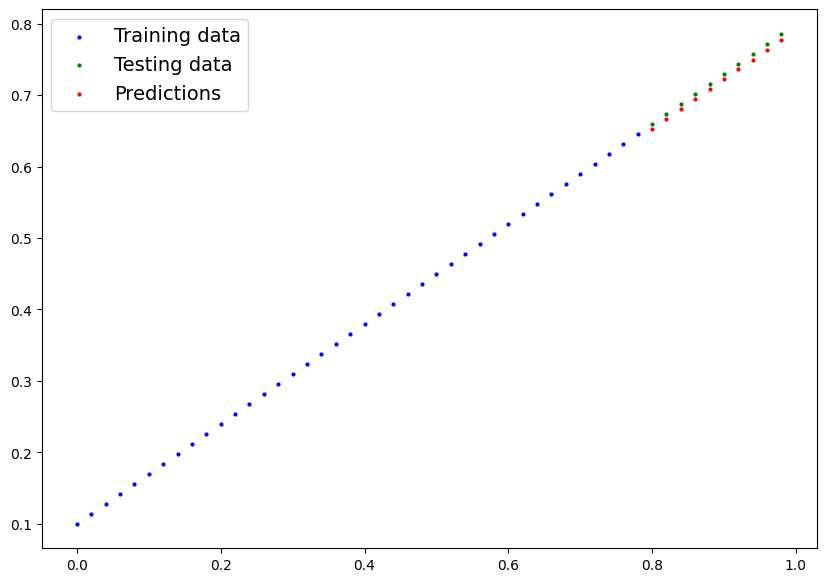

In [141]:
plot_predictions(
    X_train.cpu(),
    y_train.cpu(),
    X_test.cpu(),
    y_test.cpu(),
    y_preds.cpu()
)

### 6.5 Saving and loading the model

In [151]:
# EPOCHS = 
# LR = 
# MODEL_NAME = ...

In [ ]:
# Save a PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(
    obj=model_1.state_dict(),
    f=MODEL_SAVE_PATH
)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [146]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(
    torch.load(MODEL_SAVE_PATH)
)

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [148]:
next(loaded_model_1.parameters()).device

device(type='mps', index=0)

In [149]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6919]], device='mps:0')),
             ('linear_layer.bias', tensor([0.0995], device='mps:0'))])

In [152]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')